In [39]:
import pandas as pd
import __main__
from game_review_code.model_train import Vectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('game_data/wrangled_reviews_vis.csv')
df_group = pd.read_csv('game_data/wrangled_reviews.csv')

In [41]:
__main__.Vectorizer = Vectorizer

In [42]:
model = pd.read_pickle('ml_models/ms_score.pkl')

X = df_group.drop(columns=['Metascore', 'User Score', 'Title', 'Platform', 'Release Day of Month', 'Unnamed: 0'])

pred = model.predict(X)
true = df_group['Metascore']

pred_df = pd.DataFrame(data={'true': true, 'pred': pred})

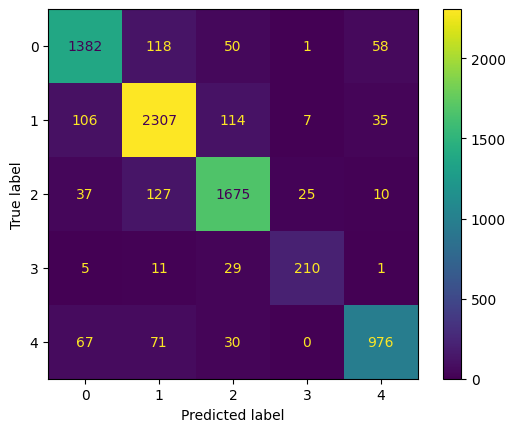

In [43]:
cm = confusion_matrix(pred_df['true'], pred_df['pred'])
display = ConfusionMatrixDisplay(cm)
display.plot()

In [44]:
# questions - plots:
# 1. what days/months/years of release dates have the highest scorers ==> top dates/find year pattern or correlation to real world events
# 2. find if there are trends in dates with genre, developer, game description, can you correlate with real world events
# if trend/correlation in dates, repeat the following for each period in time of trend/event
# 4. what combination of genres is most likely to be a high scorer - heatmap ==> top 3 genre combinations
# 5. what developers put games that are likely to be high scorers ==> top 3 developers 
# 6. what do those top developers do often/have in common ==> find pattern
# 7. what do the highest scorers have in common in the description written ==> top words

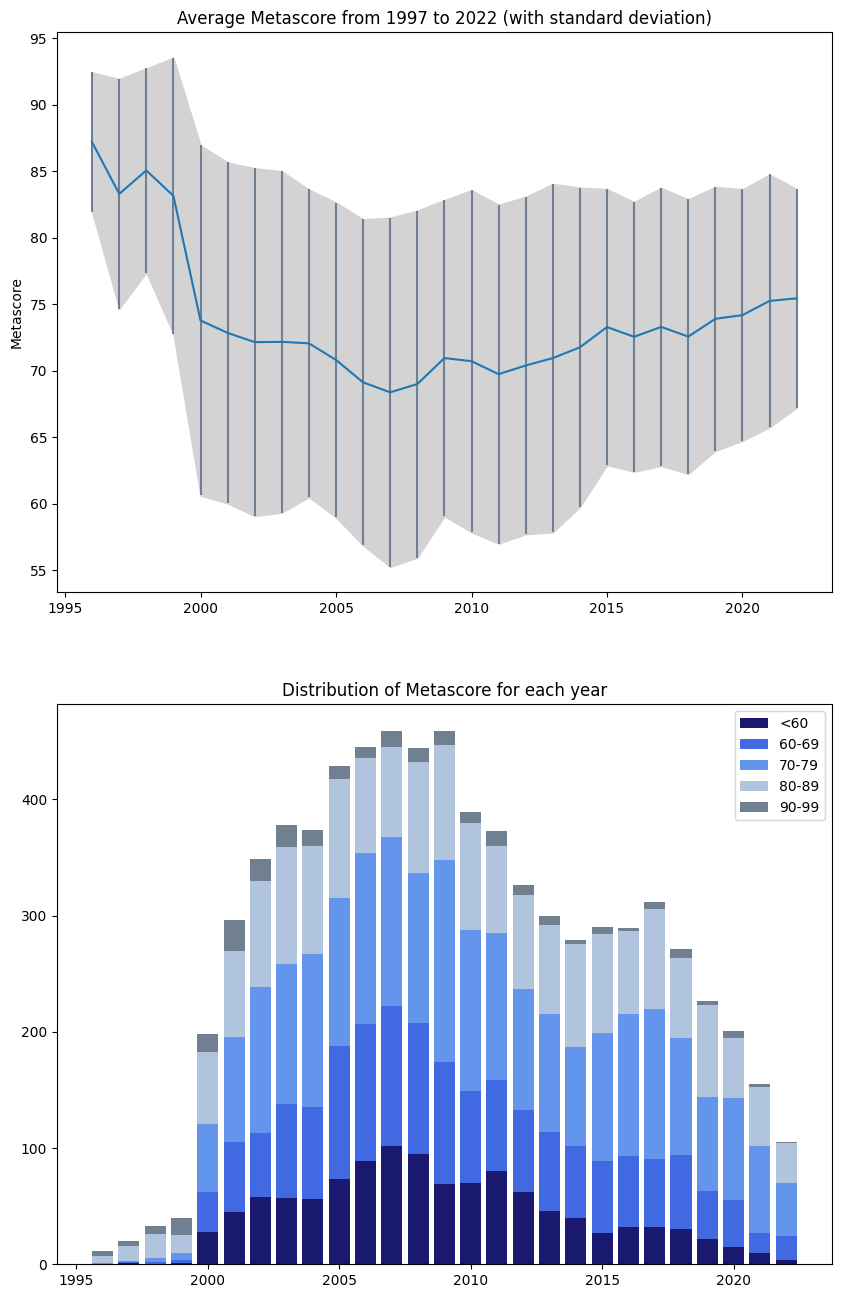

In [45]:
# question 1- years:
score = 'Metascore'

years = df['Release Year'].sort_values(ascending=True).unique()
mean = df.groupby('Release Year').mean()[score]
std = df.groupby('Release Year').std()[score]

def count(group, year):
    df_year = df_group[(df_group['Release Year'] == year) &
                       (df_group[score] == group)]
    return len(df_year)

a_counts = [count('90-99', year) for year in years]
b_counts = [count('80-89', year) for year in years]
c_counts = [count('70-79', year) for year in years]
d_counts = [count('60-69', year) for year in years]
e_counts = [count('<60', year) for year in years]

f, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 16))

def sum_counts(*counts):
    add = zip(*counts)
    sums = [sum(list(counts)) for counts in add]
    return sums

# Line plot of yearly averages with error bar using standard deviation
ax1.errorbar(x=mean.index, y=mean, yerr=std, ecolor='slategrey')
ax1.fill_between(x=mean.index, y1=(mean-std), y2=(mean+std), color='lightgrey')

# The amount of each class for each year
ax2.bar(x=years, height=e_counts, label='<60', color='midnightblue')
ax2.bar(x=years, height=d_counts, bottom=e_counts, label='60-69', color='royalblue')
ax2.bar(x=years, height=c_counts, bottom=sum_counts(d_counts, e_counts), label='70-79', color='cornflowerblue')
ax2.bar(x=years, height=b_counts, bottom=sum_counts(c_counts, d_counts, e_counts), label='80-89', color='lightsteelblue')
ax2.bar(x=years, height=a_counts, bottom=sum_counts(b_counts, c_counts, d_counts, e_counts), label='90-99', color='slategrey')

ax1.set_title(f'Average {score} from 1997 to 2022 (with standard deviation)')
ax1.set_ylabel(score)

ax2.set_title(f'Distribution of {score} for each year')
ax2.legend()

In [46]:
# Top genres all time heatmap + top genres per each year barplot
# top words in desc for all time barplot + top words in desc for each year barh

In [57]:
genres = list(df.columns[13:])

genre_combos = {}
for genre1 in genres:
    for genre2 in genres:
        if genre2 != genre1:
            for genre3 in genres:
                if (genre3 != genre1) & (genre3 != genre2):
                    df_genres = df_group[(df[genre1] == 1) &
                                   (df[genre2] == 1) &
                                   (df[genre2] == 1)]
                    genres_mean = df_genres[score].mean()
                    genre_combos[f'{genre1},{genre2},{genre3}'] = genres_mean